# What's the point?
We have been working with basic kinematics, albeit with new tools: graphical interpretation, dervitatives and integrals.  These techniques are invaluable for solving problem, modelling phenomenon that falls outside of the 'naive' constant acceleration world.

Time to raise the stakes. Motion doesn't always happen in one direction it can take place in many.  It is time to think about vectors.

In [ ]:
#@title Usual Suspects...
# First the usual imports:
import numpy as np
# matplotlib is the tool that will create the graphs
import matplotlib.pyplot as plt

## Introduction

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Ijk-coordinate-system.png/233px-Ijk-coordinate-system.png" align="right"/>
Vectors are usually represented as arrays of values.  While there is a lot more to this we can begin by the representation of a value that has magnitude and direction by looking at the 'cartesian' representation of a vector:

$$\vec{A} = \left[ a_x, a_y, a_z \right]$$
$$\vec{B} = \left[ b_x, b_y, b_z \right]$$

The way we represent this in code is something like:
```python
aVec = np.array( [1.2, -3.1, 4.2 ] )
bVec = np.array( [-2.5, 3.1, -3.7 ] )
```

In a mathematical we can also use *i, j, k* notation which would take the following form:
$$
\vec{A} = a_x\;\color{lightblue}{\hat{i}} + a_y\;\color{lightblue}{\hat{j}} + a_z\;\color{lightblue}{\hat{k}} \\
\vec{B} = b_x\;\color{lightblue}{\hat{i}} + b_y\;\color{lightblue}{\hat{j}} + b_z\;\color{lightblue}{\hat{k}}
$$

All three of these representations constitute the same idea (obviously, the python code puts specific numbers in place of the individual constants.)

The circumflex ($\hat{\;}$) is just a mathematical symbol that indicates that the label underneath is a vector pointing in a direction with a length of 1 and no units. I'll get into a more formal definition later.  For now it is just an algebraic place holder so we can use ordinary algebra to keep track of components. For instance consider adding the two above vectors and the resulting expansion...
<!-- Cool short cut to generate the above algebraic structure -->
$$
\begin{align*}
\vec{A} + \vec{B} &= a_x\;\color{lightblue}{\hat{i}} + a_y\;\color{lightblue}{\hat{j}} + a_z\;\color{lightblue}{\hat{k}}\quad +\;... \\ 
  &\quad \quad \quad \quad b_x\;\color{lightblue}{\hat{i}} + b_y\;\color{lightblue}{\hat{j}} + b_z\;\color{lightblue}{\hat{k}} \\
  &= (a_x+b_x)\;\color{lightblue}{\hat{i}} + (a_y+a_y)\;\color{lightblue}{\hat{j}} + (a_z+b_z)\;\color{lightblue}{\hat{k}}
\end{align*}
$$
As you can see, with this notation, the simple arithmetic operations on vectors make a lot more sense. Just follow the same rules as algebra for simplication.

$$
\begin{align*}
3 \cdot \vec{A} &= 3\;a_x\;\color{lightblue}{\hat{i}} + 3\;a_y\;\color{lightblue}{\hat{j}} + 3\;a_z\;\color{lightblue}{\hat{k}} \\
- \vec{B} &=  (-b_x)\;\color{lightblue}{\hat{i}} + (-b_y)\;\color{lightblue}{\hat{j}} + (-b_z)\;\color{lightblue}{\hat{k}}
\end{align*}
$$



## Some mathematical details


There is actually a mathematical definition for the 'hat' operation but before we get to this we need to define another useful concept, the vector length or "norm" of a vector.

If
$$\vec{V}=v_x\;\color{lightblue}{\hat{i}} + v_y\;\color{lightblue}{\hat{j}} + v_z\;\color{lightblue}{\hat{k}}$$
then
$$\text{norm}(\vec{V}) \equiv \left|\vec{V}\right|=\sqrt{v_x^2+v_y^2+v_z^2}$$

In two dimenstions this is our familiar pythagorean theorem formula. In higher dimensions it is known as the length of the vector and is simply the magnitude of a vector.  Notice a couple of things. First, the 'norm' or length is always a positive scalar value.  It is only 0 if the vector itself is 0.  Second it has the same units of whatever the units of the components are.  If the vector is a displacement then all the dimensions of the coefficients might be in meters. The length is in meters as well.  If the vector is a force vector then the units of the coeficcients might be in newtons which means the norm has units of newtons. 

We will take advantage of another way to get to this calculation later but this is the first step.

Now to define the 'hat' vector laid out above is actually called the 'unit vector' with the above operation to get the unit vector that points in the direction of a vector $\vec{V}$ you perform the following operation:

$$
\begin{align*}
 \text{unit}(\vec{V}) \equiv \hat{V} &=\frac{\vec{V}}{\left|\vec{V}\right|} \\
  &=\frac{v_x\;\color{lightblue}{\hat{i}} + v_y\;\color{lightblue}{\hat{j}} + v_z\;\color{lightblue}{\hat{k}}}{\sqrt{v_x^2+v_y^2+v_z^2}} 
\end{align*}
$$

### Q1:
>  Show that the $\left|\hat{V}\right|$   is equal to 1. 



In [ ]:
#@title Computational experimental area
aVec = np.array( [1.2, -3.1, 4.2 ] )

print(f"vector A = {aVec}")
#print(f"vector B = {bVec}")

aVecLength = np.sqrt(aVec[0]*aVec[0] + aVec[1]*aVec[1] + aVec[2]*aVec[2])
print(f"|A| = {aVecLength:5.1f}")

aVecUnit = aVec / aVecLength
print(f"hat A = {aVecUnit}")


## Dot Product
We can multiply vectors in the same way we can scalar values.  The process is a bit different than ordinary multiplication and the interpretation of what it means changes a little bit.

### Introduction

To simplify the notation we can, for now, consider two vectors which lie in the $x-y$ plane.  Let's look at this from the physics perspective.  
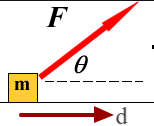Last year we encountered a calculation where we calculated the Work done on an object by translating it in the presence of a force (whether or not the force is responsible for the movement.)
We learned last year that the work (which leads to the energy change of the system) is given by the expression $\dots$

$$\mathcal{W} = F \; d \; \cos(\theta)$$

With this expression we can see two basic facets of the calculation of work: The maximum work done is when the Force, F, and the displacement, d, lie in the same direction.  The least work done is when the force lies at right angle to the displacement.  Positive work adds energy to the system, while negative work (when the force opposes the displacement in some way) takes it away.  Noting that the both the force and displacement are vectors, is there some direct mathematical tool that will determine the work done.

It all comes down to areas.

Multiplication, in general, is an area calculation. It is, at a fundamental level, an area.  The difference in the case above is the mechanism of the area needs to account for the distortion produced by the vectors not necessarily being aligned.  This is what the dot product allows us to do.

For simplicity lets presume that there is no component of the above vectors (force or displacement) that lie in the z axis.
$$
\vec{F} = F_x\;\hat{i} + F_y\;\hat{j} \\
\vec{d} = d_x\;\hat{i} + d_y\;\hat{j}
$$

Try something simple like mulitplying these two quantities together and see what we get:
$$
\begin{align*}
\mathscr{W} &= \vec{F} \cdot \vec{d} \\
&= \left( F_x\;\hat{i} + F_y\;\hat{j} \right) \cdot \left( d_x\;\hat{i} + d_y\;\hat{j} \right) \\
&\overset {\tiny{FOIL}}{=} F_x\;d_x\;(\hat{i}\cdot \hat{i})  + F_x\;d_y\;(\hat{i}\cdot \hat{j}) + \ldots + F_y\;d_y\;(\hat{j}\cdot \hat{j})
\end{align*}
$$
Let's take our cue from what we learned about work above, when two vectors are at $90^\circ$, the 'dot' product is 0.  It is a $+$ maximum when they point the same way. Based on how we defined the unit vectors $\hat{i}, \hat{j}, \text{and } \hat{k}$ above we can easily see that any unit vector 'dotted' into itself is equal to 1 while an y unit vector 'dotted' into any of the other unit vectors (because they are all at $90^\circ$) is 0. To wit...

$$ 
 \hat{i} \cdot \hat{i} = \hat{j} \cdot \hat{j} = \hat{k} \cdot \hat{k} = 1 \\
 \hat{i} \cdot \hat{j} = \hat{j} \cdot \hat{k} = \hat{k} \cdot \hat{i} = 0
$$

So the above calculation reduces to...
$$
\begin{align*}
\mathscr{W} &= \vec{F} \cdot \vec{d} \\
&= F_x\;d_x\;  + F_y\;d_y
\end{align*}
$$


### A bit more detail

While we have couched this in terms of work, 'Dot' products are a more general tool with a variety of uses.  For one they provide a quick and easy way to determine to what degree two vectors have components that lie along one another.

So lets see how this might work.
  - When we know the components of a vector we can determine the dot product by simply multiplying the components of each coordinate together, add them up and get the result. The interpretation is that it is the area formed by the degree of overlap of one vector on another. 
  > $\vec{A}\cdot\vec{B} = a_x \cdot b_x + a_y \cdot b_y + a_z \cdot b_z$

  - When we only know the magnitudes of the two vectors and the angle between them we can perform the calculation the way we learned last year.
  > $\vec{A}\cdot\vec{B} = \left|A\right|\;\left|B\right|\cos(\theta)$

  - Also we can determine the precise angle between any two vectors in 3D space when we know their component form by determining the $\cos(\theta)$ from the first algorithm above.
  >$\cos(\theta) = \frac{\vec{A}\cdot\vec{B}}{\left|A\right|\;\left|B\right|}$


## Practice

1. Given two displacement vectors:

> $\vec{d_1} = [12.0, -1.2, 5.7] m$ and $\vec{d_2} = [-3.6, -2.4, 0.7] m$

> a. if an object started at $d_1$ and went to $d_2$ what is the distance travelled?

> b. What is the angle between two 3D displacement vectors?


In [ ]:
#@title Don't open this until you have tried this yourself
d1 = np.array([12.0, -1.2, 5.7])
d2 = np.array([-3.6, -2.4, 0.7])

delD = d2-d1
print(f"a: displacement: {norm(delD):8.2f}")

def dotP(v1, v2):
#  return v1[0]*v2[0] + v1[1]*v2[1] + v1[2]*v2[2]
  return np.sum(v1*v2)

def norm(v1):
  return np.sqrt(dotP(v1,v1))

print(f"b: angle: {np.degrees( np.arccos(dotP(d1,d2) / (norm(d1) * norm(d2))) ):8.1f}°")


 2. Given a force $\vec{F_1}$ acting on a body identified below while it moves through a distance $\Delta \vec{d}$:
 > $\vec{F_1} = [8.3, 1.2, -3.1] N$ and $\Delta \vec{d} = [7.6, 1.6, -1.2] m$

> a. Is the work done increase the body's total energy or decrease it?
> b. By what amount is the total energy of the body change?


## Vector Displays

In [ ]:
#@title Fancy way to do what is above.
# fancy way to caculate the length of a vector
def lengthVec(v):
  return np.sqrt(np.sum(v**2))
  #return np.linalg.norm(v)  # built-in function but I want you to see how it is done.

# fancy way to build a unit vector (a vector that points but has unit length)
def unitVec(v):
  return v/lengthVec(v)


We can do 3D plots in matplot lib but this isn't convenient if you cannot manipulate the result to help with visualization. CoLab plots are static. This might best be done with a website:
 - [3D Vector Plotter](https://academo.org/demos/3d-vector-plotter/)
    - entirely graphical
 - [Geogebra](https://www.geogebra.org/3d?lang=en)
    - Use **A = Point((ax,ay,az))** to create points
    - Use **Vector(A)** to create vectors centered on the origin


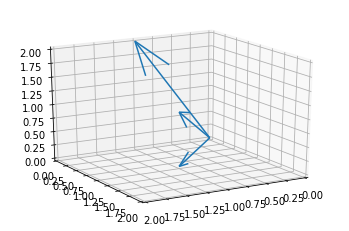

In [ ]:
#@title How to do 3D Plots
# The plots are static which makes them hard to visualize.
a = np.array([1,0,2])
b = np.array([1,1,0])
c = np.array([1,1,1])
lengthVec(a)

# Add some 3D tools
from mpl_toolkits.mplot3d import Axes3D

origin = [0,0,0]

oX, oY, oZ = zip(origin, origin, origin)
X, Y, Z = zip(a, b, c)


# plotting
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
# axes.view_init(30, 30)


axes.quiver(oX, oY, oZ, X, Y, Z)
axes.set_xlim(0,2)
axes.set_ylim(0,2)
axes.set_zlim(0,2)

axes.view_init(20, 60)


In [ ]:
#@title Testing for algorithms
# Compare the two techniques
%time magOne = lengthVec(aVec)
print(f"|A| = {magOne:5.2f}")

%time magTwo = np.sqrt(np.dot(aVec,aVec))
print(f" {magTwo:5.2f}" )

print(f"hat A = {unitVec(aVec)}")

print(f"|hat A| = {lengthVec(unitVec(aVec))}")

In [ ]:
#@title Tools for exploration
# wrapper for the standard dot product
def dotProduct(v, w):
  return np.dot(v, w)

# wrapper for the standard cross product
def crossProduct(v, w):
  return np.cross(v, w)
